
1. Design a multilayer deep neural network with a linear input layer, tanh or relu activation for the hidden layers and sigmoid or softmax activation for the output layer.

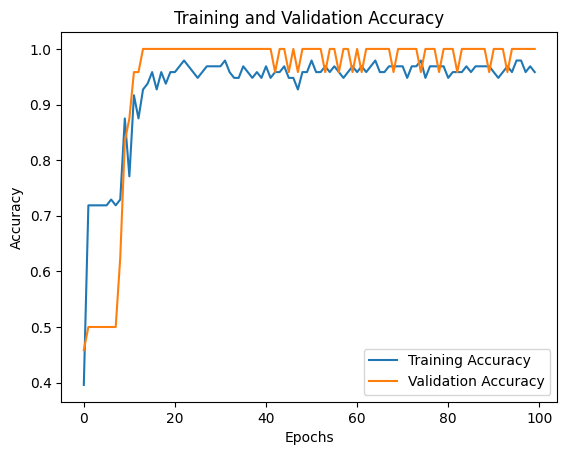

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

iris = load_iris()
X, y = iris.data, iris.target
encoder = OneHotEncoder()
y = encoder.fit_transform(y.reshape(-1, 1)).toarray()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def custom_tanh(x):
    return (K.exp(x) - K.exp(-x)) / (K.exp(x) + K.exp(-x))
def custom_relu(x):
    return K.maximum(0.0, x)
def custom_sigmoid(x):
    return 1 / (1 + K.exp(-x))

model = Sequential([Dense(64, input_shape=(4,)),Activation(custom_relu),Dense(64),Activation(custom_tanh),Dense(3),Activation(custom_sigmoid)])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_split=0.2, verbose=0)

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

2. Design a deep nn and optimize the network with gradient descent and optimize the same with stochastic gradient descent.

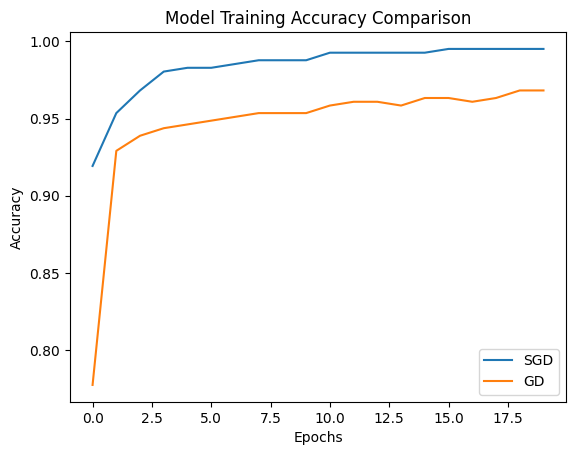

Gradient Descent Final Accuracy: 96.82%
Stochastic Gradient Descent Final Accuracy: 99.51%


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

def train_model(optimizer):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, validation_split=0.1, verbose=0)
    return history.history['accuracy']

accuracy_gd = train_model('sgd')
accuracy_sgd = train_model('adam')

plt.plot(accuracy_sgd, label='SGD')
plt.plot(accuracy_gd, label='GD')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Training Accuracy Comparison')
plt.legend()
plt.show()

final_accuracy_gd = accuracy_gd[-1] * 100
final_accuracy_sgd = accuracy_sgd[-1] * 100
print("Gradient Descent Final Accuracy: {:.2f}%".format(final_accuracy_gd))
print("Stochastic Gradient Descent Final Accuracy: {:.2f}%".format(final_accuracy_sgd))

3. Demonstrate the usage of dropout and gradient clipping in a neural network training scenario.

Dropout Probabilities and Accuracies:
Dropout Probability | Test Accuracy
0.1                | 0.27
0.2                | 0.39
0.3                | 0.50
0.4                | 0.71
0.5                | 0.78

Clipout Values and Accuracies:
Clipout Value       | Test Accuracy
0.1                | 0.11
0.2                | 0.11
0.3                | 0.11
0.4                | 0.11
0.5                | 0.11


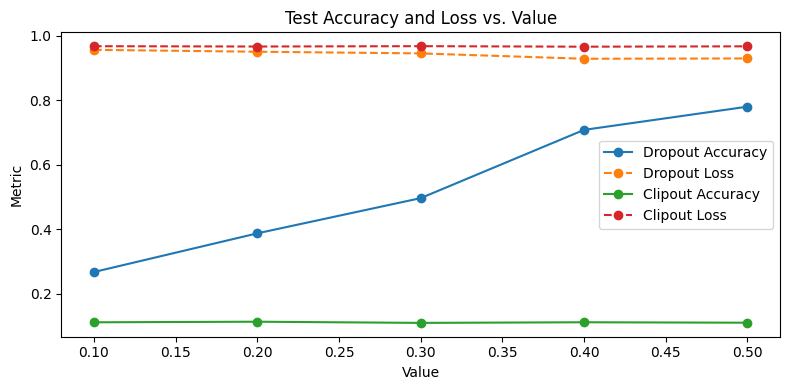

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

def train_model(activation_type=None, value=0.0):
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])
    if activation_type == 'dropout':
        model.add(Dropout(value))
        model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    elif activation_type == 'clipout':
        opt = tf.keras.optimizers.Adam(clipvalue=value)
        model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    else:
        model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    model.fit(x_train, y_train, epochs=5, batch_size=256, verbose=0)
    return model.evaluate(x_test, y_test, verbose=0)

dropout_probs = clipout_values = [0.1, 0.2, 0.3, 0.4, 0.5]
dropout_accuracies, dropout_losses, clipout_accuracies, clipout_losses = [], [], [], []

for prob in dropout_probs:
    acc, loss = train_model('dropout', prob)
    dropout_accuracies.append(acc)
    dropout_losses.append(loss)

for value in clipout_values:
    acc, loss = train_model('clipout', value)
    clipout_accuracies.append(acc)
    clipout_losses.append(loss)

print("Dropout Probabilities and Accuracies:")
print("Dropout Probability | Test Accuracy")
for prob, acc in zip(dropout_probs, dropout_accuracies):
    print(f"{prob:<18} | {acc:.2f}")

print("\nClipout Values and Accuracies:")
print("Clipout Value       | Test Accuracy")
for value, acc in zip(clipout_values, clipout_accuracies):
    print(f"{value:<18} | {acc:.2f}")

plt.figure(figsize=(8,4))
plt.plot(dropout_probs, dropout_accuracies, marker='o', label='Dropout Accuracy')
plt.plot(dropout_probs, dropout_losses, marker='o', linestyle='--', label='Dropout Loss')
plt.plot(clipout_values, clipout_accuracies, marker='o', label='Clipout Accuracy')
plt.plot(clipout_values, clipout_losses, marker='o', linestyle='--', label='Clipout Loss')
plt.title('Test Accuracy and Loss vs. Value')
plt.xlabel('Value')
plt.ylabel('Metric')
plt.legend()
plt.tight_layout()
plt.show()

4. implement a program showcasing multitask learning with early stopping,

Epoch 1/50
25/25 [==============================] - 3s 28ms/step - loss: 0.2996 - output_task1_loss: 0.4657 - output_task2_loss: 0.1336 - output_task1_mae: 0.5804 - output_task2_mae: 0.2959 - val_loss: 0.1096 - val_output_task1_loss: 0.1157 - val_output_task2_loss: 0.1036 - val_output_task1_mae: 0.2782 - val_output_task2_mae: 0.2699
Epoch 2/50
25/25 [==============================] - 0s 14ms/step - loss: 0.1046 - output_task1_loss: 0.1145 - output_task2_loss: 0.0947 - output_task1_mae: 0.2827 - output_task2_mae: 0.2599 - val_loss: 0.0999 - val_output_task1_loss: 0.1060 - val_output_task2_loss: 0.0938 - val_output_task1_mae: 0.2680 - val_output_task2_mae: 0.2637
Epoch 3/50
25/25 [==============================] - 0s 14ms/step - loss: 0.0974 - output_task1_loss: 0.1047 - output_task2_loss: 0.0901 - output_task1_mae: 0.2734 - output_task2_mae: 0.2543 - val_loss: 0.0941 - val_output_task1_loss: 0.0969 - val_output_task2_loss: 0.0914 - val_output_task1_mae: 0.2575 - val_output_task2_mae: 0.

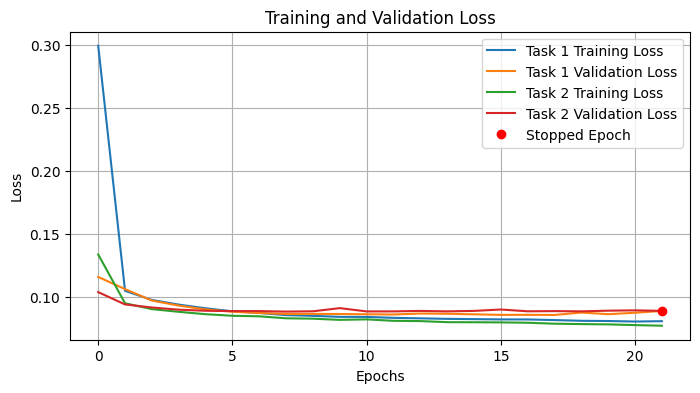

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping

x_task1 = np.random.rand(1000, 10)
x_task2 = np.random.rand(1000, 10)
y_task1 = np.random.rand(1000, 1)
y_task2 = np.random.rand(1000, 1)

input_layer = Input(shape=(10,))

branch_task1 = Dense(64, activation='relu')(input_layer)
output_task1 = Dense(1, name='output_task1')(branch_task1)
model_task1 = Model(inputs=input_layer, outputs=output_task1)
model_task1.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

branch_task2 = Dense(64, activation='relu')(input_layer)
output_task2 = Dense(1, name='output_task2')(branch_task2)
model_task2 = Model(inputs=input_layer, outputs=output_task2)
model_task2.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

multitask_model = Model(inputs=input_layer, outputs=[output_task1, output_task2])
multitask_model.compile(optimizer='adam',
                        loss={'output_task1': 'mean_squared_error',
                              'output_task2': 'mean_squared_error'},
                        loss_weights={'output_task1': 0.5, 'output_task2': 0.5},
                        metrics={'output_task1': 'mae', 'output_task2': 'mae'})

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = multitask_model.fit(x_task1, [y_task1, y_task2], validation_split=0.2, epochs=50, callbacks=[early_stopping])

plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Task 1 Training Loss')
plt.plot(history.history['val_output_task1_loss'], label='Task 1 Validation Loss')
plt.plot(history.history['output_task2_loss'], label='Task 2 Training Loss')
plt.plot(history.history['val_output_task2_loss'], label='Task 2 Validation Loss')
plt.plot(early_stopping.stopped_epoch, history.history['val_loss'][early_stopping.stopped_epoch], 'ro', label='Stopped Epoch')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

5. Sentiment analysis using recurrent neural network.

17464789/17464789 [==============================] - 0s 0us/step
Epoch 1/5
20/20 [==============================] - 8s 189ms/step - loss: 0.6907 - accuracy: 0.5860 - val_loss: 0.6851 - val_accuracy: 0.6656
Epoch 2/5
20/20 [==============================] - 3s 140ms/step - loss: 0.6484 - accuracy: 0.7265 - val_loss: 0.5395 - val_accuracy: 0.7240
Epoch 3/5
20/20 [==============================] - 2s 123ms/step - loss: 0.4609 - accuracy: 0.7972 - val_loss: 0.4177 - val_accuracy: 0.8226
Epoch 4/5
20/20 [==============================] - 3s 145ms/step - loss: 0.3330 - accuracy: 0.8690 - val_loss: 0.3685 - val_accuracy: 0.8382
Epoch 5/5
782/782 [==============================] - 3s 4ms/step - loss: 0.3732 - accuracy: 0.8400
Test Accuracy: 0.8399999737739563
1641221/1641221 [==============================] - 0s 0us/step


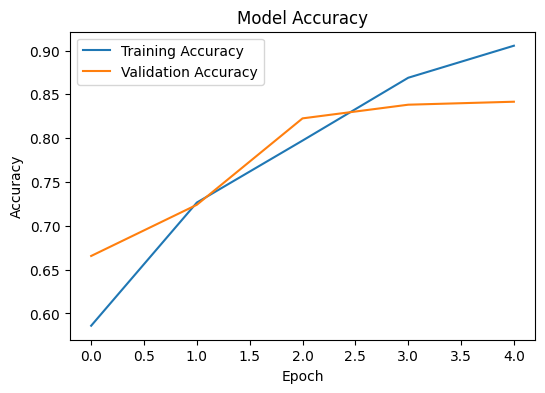

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,LSTM, Dropout, Dense
from tensorflow.keras.datasets import imdb
import matplotlib.pyplot as plt

max_words = 10000
maxlen = 100
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_words)
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)
model = Sequential([
    Embedding(max_words, 32, input_length=maxlen),
    LSTM(32),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=5, batch_size=1024, validation_split=0.2)
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy}')
word_index = imdb.get_word_index()

plt.figure(figsize=(6, 4))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
def predict_sentiment(text):
    word_index = imdb.get_word_index()
    words = text.lower().split()
    sequence = [word_index.get(word, 0) for word in words]
    sequence = pad_sequences([sequence], maxlen=maxlen)
    prediction = model.predict(sequence)[0][0]
    if prediction > 0.5:
        return "Negative"
    elif prediction <= 0.5:
        return "Positive"
    else:
        return "Neutral"

user_input = input("Enter a sentence: ")
print(f"Sentiment: {predict_sentiment(user_input)}")

Enter a sentence: i love my country
1/1 [==============================] - 0s 18ms/step
Sentiment: Positive


6. Write a program for stock market prediction using LSTM.

[*********************100%%**********************]  1 of 1 completed


Epoch 1/10
17/17 [==============================] - 37s 9ms/step - loss: 0.0758
Epoch 2/10
17/17 [==============================] - 0s 8ms/step - loss: 0.0082
Epoch 3/10
17/17 [==============================] - 0s 7ms/step - loss: 0.0036
Epoch 4/10
17/17 [==============================] - 0s 8ms/step - loss: 0.0029
Epoch 5/10
17/17 [==============================] - 0s 7ms/step - loss: 0.0023
Epoch 6/10
17/17 [==============================] - 0s 10ms/step - loss: 0.0021
Epoch 7/10
17/17 [==============================] - 0s 8ms/step - loss: 0.0021
Epoch 8/10
17/17 [==============================] - 0s 7ms/step - loss: 0.0021
Epoch 9/10
17/17 [==============================] - 0s 7ms/step - loss: 0.0020
Epoch 10/10
3/3 [==============================] - 1s 5ms/step


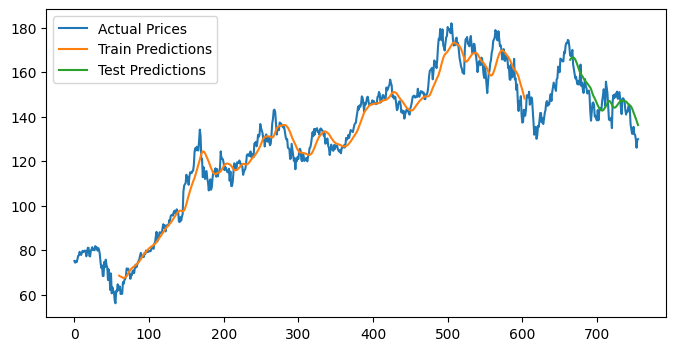

In [ ]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

data = yf.download("AAPL", start="2020-01-01", end="2023-01-01")['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)
train_size = int(len(data) * 0.8)
train_data, test_data = data[:train_size], data[train_size:]

def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X).reshape(-1, time_step, 1), np.array(y)

X_train, y_train = create_dataset(train_data)
X_test, y_test = create_dataset(test_data)

model = Sequential([LSTM(50, return_sequences=True, input_shape=(60, 1)), LSTM(50), Dense(1)])
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

train_predict = scaler.inverse_transform(model.predict(X_train))
test_predict = scaler.inverse_transform(model.predict(X_test))
actual_prices = scaler.inverse_transform(data)

plt.figure(figsize=(8, 4))
plt.plot(actual_prices, label='Actual Prices')
plt.plot(range(60, 60 + len(train_predict)), train_predict, label='Train Predictions')
plt.plot(range(60 + len(train_predict) + 60, 60 + len(train_predict) + 60 + len(test_predict)), test_predict, label='Test Predictions')
plt.legend()
plt.show()

7.Develop a GRU based term stock price prediction model for tickers in yahoo finance

[*********************100%%**********************]  1 of 1 completed


Epoch 1/10
17/17 [==============================] - 5s 9ms/step - loss: 0.0988
Epoch 2/10
17/17 [==============================] - 0s 8ms/step - loss: 0.0094
Epoch 3/10
17/17 [==============================] - 0s 8ms/step - loss: 0.0041
Epoch 4/10
17/17 [==============================] - 0s 7ms/step - loss: 0.0024
Epoch 5/10
17/17 [==============================] - 0s 7ms/step - loss: 0.0014
Epoch 6/10
17/17 [==============================] - 0s 7ms/step - loss: 0.0010
Epoch 7/10
17/17 [==============================] - 0s 7ms/step - loss: 9.1446e-04
Epoch 8/10
17/17 [==============================] - 0s 7ms/step - loss: 8.6018e-04
Epoch 9/10
17/17 [==============================] - 0s 9ms/step - loss: 8.4119e-04
Epoch 10/10
3/3 [==============================] - 1s 6ms/step


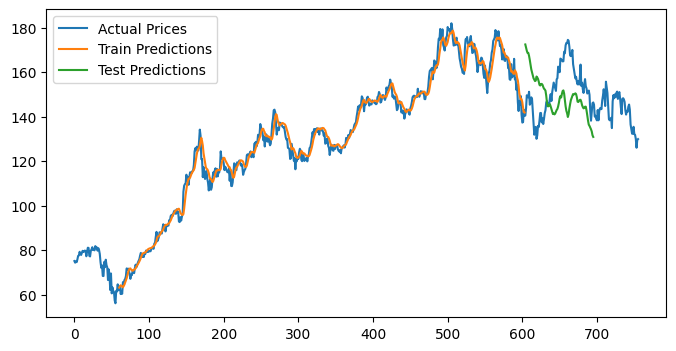

In [ ]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

ticker = "AAPL"
data = yf.download(ticker, start="2020-01-01", end="2023-01-01")['Close'].values.reshape(-1, 1)

scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)
train_size = int(len(data) * 0.8)
train_data, test_data = data[:train_size], data[train_size:]

def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X).reshape(-1, time_step, 1), np.array(y)

X_train, y_train = create_dataset(train_data)
X_test, y_test = create_dataset(test_data)

model = Sequential([GRU(50, return_sequences=True, input_shape=(60, 1)), GRU(50), Dense(1)])
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

train_predict = scaler.inverse_transform(model.predict(X_train))
test_predict = scaler.inverse_transform(model.predict(X_test))
actual_prices = scaler.inverse_transform(data)

plt.figure(figsize=(8, 4))
plt.plot(actual_prices, label='Actual Prices')
plt.plot(range(60, 60 + len(train_predict)), train_predict, label='Train Predictions')
plt.plot(range(60 + len(train_predict), 60 + len(train_predict) + len(test_predict)), test_predict, label='Test Predictions')
plt.legend()
plt.show()

8.Classification of MNIST Dataset using CNN

Epoch 1/5
1875/1875 [==============================] - 15s 6ms/step - loss: 0.1521 - accuracy: 0.9545 - val_loss: 0.0477 - val_accuracy: 0.9840
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0467 - accuracy: 0.9854 - val_loss: 0.0364 - val_accuracy: 0.9889
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0324 - accuracy: 0.9896 - val_loss: 0.0289 - val_accuracy: 0.9896
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0234 - accuracy: 0.9928 - val_loss: 0.0298 - val_accuracy: 0.9897
Epoch 5/5
313/313 [==============================] - 1s 2ms/step
Predictions with Images:


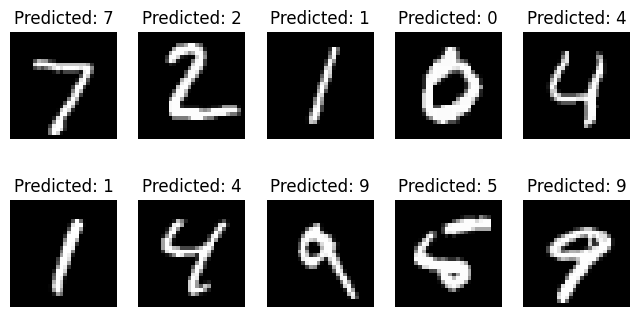

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt
import numpy as np

mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

num_predictions = 10
print("Predictions with Images:")
plt.figure(figsize=(8, 4))
for i in range(num_predictions):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {predicted_labels[i]}")
    plt.axis('off')
plt.show()

9. Implement a program on adverserial training, tangent prop and tangent classifier.

Epoch 1/5
79/79 [==============================] - 2s 4ms/step - loss: 0.8776 - accuracy: 0.7684
Epoch 2/5
79/79 [==============================] - 0s 4ms/step - loss: 0.3388 - accuracy: 0.9058
Epoch 3/5
79/79 [==============================] - 0s 4ms/step - loss: 0.2592 - accuracy: 0.9308
Epoch 4/5
79/79 [==============================] - 0s 5ms/step - loss: 0.2124 - accuracy: 0.9414
Epoch 5/5
79/79 [==============================] - 0s 4ms/step - loss: 0.1800 - accuracy: 0.9552
Epoch 1/5 completed
Epoch 2/5 completed
Epoch 3/5 completed
Epoch 4/5 completed
Epoch 5/5 completed


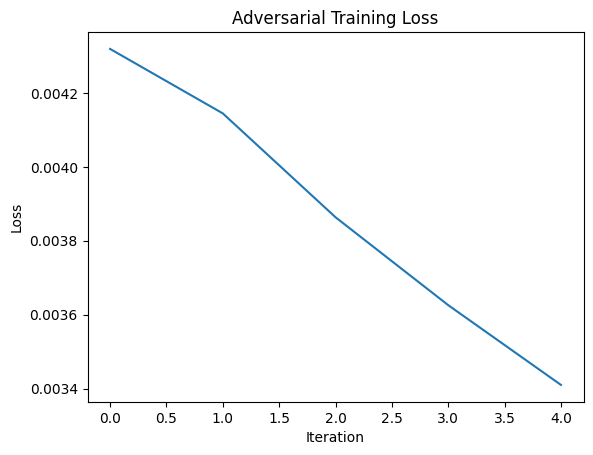

Epoch 1/5 completed
Epoch 2/5 completed
Epoch 3/5 completed
Epoch 4/5 completed
Epoch 5/5 completed


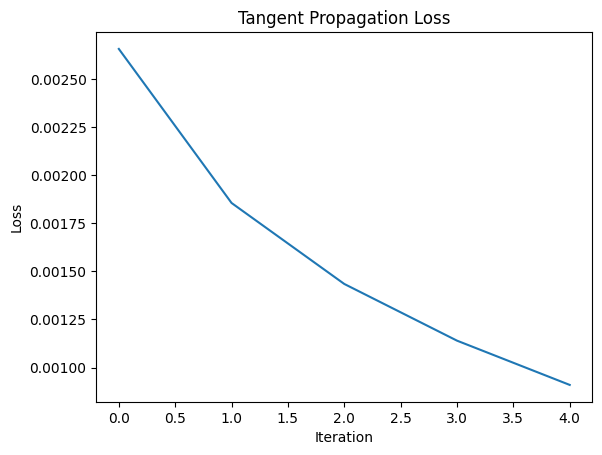

Tangent Classifier Accuracy: 0.9


In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train[:5000] / 255.0, x_test[:1000] / 255.0
y_train, y_test = y_train[:5000], y_test[:1000]
x_train = tf.convert_to_tensor(x_train, dtype=tf.float32)
x_test = tf.convert_to_tensor(x_test, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train, dtype=tf.int64)
y_test = tf.convert_to_tensor(y_test, dtype=tf.int64)

model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

def plot_loss(losses, title):
    plt.plot(losses)
    plt.title(title)
    plt.xlabel("Iteration")
    plt.ylabel("Loss")
    plt.show()

def create_adversarial_pattern(model, input_image, input_label):
    with tf.GradientTape() as tape:
        tape.watch(input_image)
        prediction = model(input_image)
        loss = tf.keras.losses.sparse_categorical_crossentropy(input_label, prediction)
    gradient = tape.gradient(loss, input_image)
    return tf.sign(gradient), loss

# Adversarial training
def adversarial_training(model, x_train, y_train, epochs=5, epsilon=0.1):
    losses = []
    for epoch in range(epochs):
        epoch_loss = 0
        for i in range(0, len(x_train), 64):
            x_batch, y_batch = x_train[i:i+64], y_train[i:i+64]
            perturbations, loss = create_adversarial_pattern(model, x_batch, y_batch)
            x_adv = tf.clip_by_value(x_batch + epsilon * perturbations, 0, 1)
            epoch_loss += np.mean(loss)
            model.train_on_batch(x_adv, y_batch)
        print(f"Epoch {epoch+1}/{epochs} completed")
        losses.append(epoch_loss / len(x_train))
    plot_loss(losses, "Adversarial Training Loss")

model.fit(x_train, y_train, epochs=5, batch_size=64)
adversarial_training(model, x_train, y_train, epochs=5)

# Tangent propagation loss
def tangent_propagation_loss(model, x, y, lambda_tangent=0.1):
    with tf.GradientTape() as tape:
        tape.watch(x)
        predictions = model(x)
        classification_loss = tf.keras.losses.sparse_categorical_crossentropy(y, predictions)
    gradients = tape.gradient(predictions, x)
    tangent_loss = tf.reduce_sum(tf.square(tf.tensordot(gradients, tf.random.normal((28, 28)), axes=1)))
    return classification_loss + lambda_tangent * tangent_loss

# Train with tangent propagation
def train_with_tangent_propagation(model, x_train, y_train, epochs=5, lambda_tangent=0.1):
    optimizer = tf.keras.optimizers.Adam()
    losses = []
    for epoch in range(epochs):
        epoch_loss = 0
        for i in range(0, len(x_train), 64):
            x_batch, y_batch = x_train[i:i+64], y_train[i:i+64]
            with tf.GradientTape() as tape:
                loss = tangent_propagation_loss(model, x_batch, y_batch, lambda_tangent)
            gradients = tape.gradient(loss, model.trainable_variables)
            optimizer.apply_gradients(zip(gradients, model.trainable_variables))
            epoch_loss += np.mean(loss)
        print(f"Epoch {epoch+1}/{epochs} completed")
        losses.append(epoch_loss / len(x_train))
    plot_loss(losses, "Tangent Propagation Loss")

train_with_tangent_propagation(model, x_train, y_train, epochs=5)

# Tangent classifier
def tangent_classifier(x_train, y_train, x_test):
    x_train_flat = tf.reshape(x_train, (x_train.shape[0], -1))
    x_test_flat = tf.reshape(x_test, (x_test.shape[0], -1))
    distances = tf.norm(x_test_flat[:, tf.newaxis] - x_train_flat, axis=2)
    nearest_indices = tf.argmin(distances, axis=1)
    return tf.gather(y_train, nearest_indices).numpy()

# Predict and calculate accuracy
y_pred = tangent_classifier(x_train, y_train, x_test[:100])
print("Tangent Classifier Accuracy:", np.mean(y_pred == y_test[:100]))

10. Implementation of Restricted Baoltsman Machine (RBM) that demonstrate stacking.

In [ ]:
import numpy as np
import tensorflow as tf

class SimpleRBM:
    def __init__(self, input_size, output_size):
        self.input_size = input_size
        self.output_size = output_size
        self.W = tf.Variable(tf.random.normal([input_size, output_size], 0.01))
        self.h_bias = tf.Variable(tf.zeros([output_size]))
        self.v_bias = tf.Variable(tf.zeros([input_size]))

    def sample(self, probs):
        return tf.nn.relu(tf.sign(probs - tf.random.uniform(tf.shape(probs))))

    def step(self, v):
        h_probs = tf.nn.sigmoid(tf.matmul(v, self.W) + self.h_bias)
        h_sample = self.sample(h_probs)
        v_probs = tf.nn.sigmoid(tf.matmul(h_sample, tf.transpose(self.W)) + self.v_bias)
        v_sample = self.sample(v_probs)
        return h_sample, v_sample

    def train(self, data, epochs=1000, lr=0.1):
        for epoch in range(epochs):
            for v in data:
                v = np.reshape(v, (1, -1))
                h_sample, v_sample = self.step(v)
                pos_grad = tf.matmul(tf.transpose(v), h_sample)
                neg_grad = tf.matmul(tf.transpose(v_sample), self.step(v_sample)[0])
                self.W.assign_add(lr * (pos_grad - neg_grad))
                self.v_bias.assign_add(lr * tf.reduce_mean(v - v_sample, axis=0))
                self.h_bias.assign_add(lr * tf.reduce_mean(h_sample - self.step(v_sample)[0], axis=0))

    def transform(self, data):
        data = np.reshape(data, (1, -1))
        h_probs = tf.nn.sigmoid(tf.matmul(data, self.W) + self.h_bias)
        return h_probs


input_size = 6
hidden_size_1 = 3
hidden_size_2 = 2
epochs = 10
learning_rate = 0.1

data = np.array([[1, 1, 1, 0, 0, 0],
                 [1, 0, 1, 0, 0, 0],
                 [1, 1, 1, 0, 0, 0],
                 [0, 0, 1, 1, 1, 0],
                 [0, 0, 1, 1, 0, 0],
                 [0, 0, 1, 1, 1, 0]], dtype=np.float32)

rbm1 = SimpleRBM(input_size, hidden_size_1)
rbm1.train(data, epochs, learning_rate)
h1 = np.array([rbm1.transform(v) for v in data])

rbm2 = SimpleRBM(hidden_size_1, hidden_size_2)
rbm2.train(h1, epochs, learning_rate)
h2 = np.array([rbm2.transform(h) for h in h1])

print("Original Data:\n", data)
print("Features from RBM1:\n", h1)
print("Features from RBM2:\n", h2)

Original Data:
 [[1. 1. 1. 0. 0. 0.]
 [1. 0. 1. 0. 0. 0.]
 [1. 1. 1. 0. 0. 0.]
 [0. 0. 1. 1. 1. 0.]
 [0. 0. 1. 1. 0. 0.]
 [0. 0. 1. 1. 1. 0.]]
Features from RBM1:
 [[[0.0613142  0.9885739  0.3596499 ]]

 [[0.1044736  0.98440105 0.54572135]]

 [[0.0613142  0.9885739  0.3596499 ]]

 [[0.912573   0.9234299  0.8464547 ]]

 [[0.84948075 0.91155297 0.7348424 ]]

 [[0.912573   0.9234299  0.8464547 ]]]
Features from RBM2:
 [[[0.06724064 0.30043977]]

 [[0.06437141 0.31296182]]

 [[0.06724064 0.30043977]]

 [[0.02749599 0.36210698]]

 [[0.03038209 0.3535523 ]]

 [[0.02749599 0.36210698]]]
